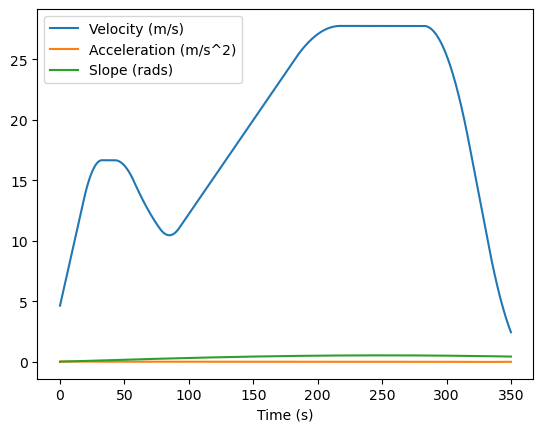

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from filter import rolling_avg

v = np.array([0,2,60,60,30,100,100,0]) # km/h
t = np.array([0,1,15,60,75,200,300,350]) # seconds

v = v/3.6 # km/h to m/s

# Increase timestep resolution
t_interp = np.linspace(t[0],t[-1],10**4)
v_interp = np.interp(t_interp,t,v)
v_interp = rolling_avg(v_interp,1000)

a_interp = np.append(np.array([0]),np.diff(v_interp)) # Derive acceleration
alpha_interp = np.zeros_like(a_interp) # Fake slope data
alpha_interp = np.pi/6*np.sin(2*np.pi*0.001*t_interp)

plt.plot(t_interp,v_interp,label='Velocity (m/s)')
plt.plot(t_interp,a_interp,label='Acceleration (m/s^2)')
plt.plot(t_interp,alpha_interp,label='Slope (rads)')
plt.xlabel('Time (s)')
plt.legend()
# plt.ylim(0,1)
plt.show()

np.save('../data/fake-velocity.npy',v_interp)
np.save('../data/fake-acceleration.npy',a_interp)
np.save('../data/fake-slope.npy',alpha_interp)
np.save('../data/fake-time.npy',t_interp)